# Loading data:

In [ ]:
!pip install pyhessian
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from pyhessian import hessian
import matplotlib.pyplot as plt

# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


# ReLU Network:

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Create a list to store all eigenvalues
all_eigenvalues_relu = []
all_traces_relu = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Compute Hessian and its eigenvalues after each epoch
    hessian_comp = hessian(model, criterion, data=(images, labels), cuda=False)
    eigenvalues, eigenvectors = hessian_comp.eigenvalues()
    all_eigenvalues_relu.append(eigenvalues)
    trace = hessian_comp.trace()
    all_traces_relu.append(trace)


Epoch [1/10], Step [100/600], Loss: 0.2260
Epoch [1/10], Step [200/600], Loss: 0.2836
Epoch [1/10], Step [300/600], Loss: 0.3687
Epoch [1/10], Step [400/600], Loss: 0.2003
Epoch [1/10], Step [500/600], Loss: 0.3130
Epoch [1/10], Step [600/600], Loss: 0.1326
Epoch [2/10], Step [100/600], Loss: 0.1236
Epoch [2/10], Step [200/600], Loss: 0.1268
Epoch [2/10], Step [300/600], Loss: 0.0867
Epoch [2/10], Step [400/600], Loss: 0.0578
Epoch [2/10], Step [500/600], Loss: 0.1585
Epoch [2/10], Step [600/600], Loss: 0.2255
Epoch [3/10], Step [100/600], Loss: 0.1230
Epoch [3/10], Step [200/600], Loss: 0.0524
Epoch [3/10], Step [300/600], Loss: 0.0610
Epoch [3/10], Step [400/600], Loss: 0.0824
Epoch [3/10], Step [500/600], Loss: 0.1252
Epoch [3/10], Step [600/600], Loss: 0.0351
Epoch [4/10], Step [100/600], Loss: 0.0403
Epoch [4/10], Step [200/600], Loss: 0.1047
Epoch [4/10], Step [300/600], Loss: 0.0505
Epoch [4/10], Step [400/600], Loss: 0.0335
Epoch [4/10], Step [500/600], Loss: 0.0340
Epoch [4/10

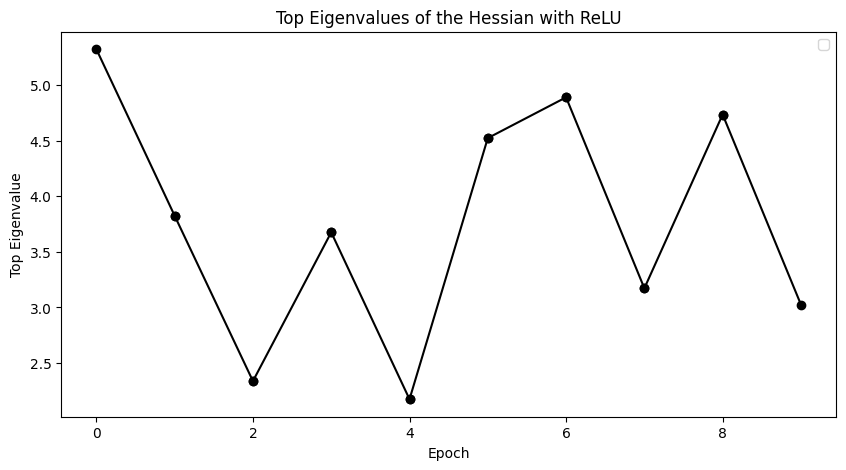

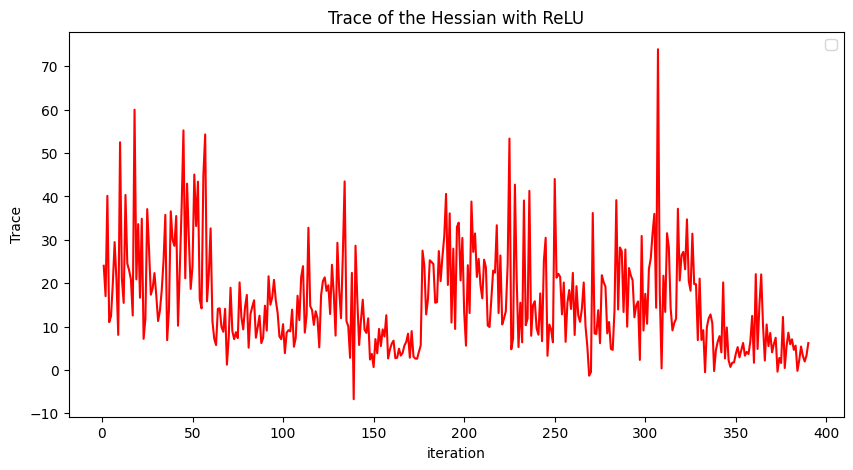

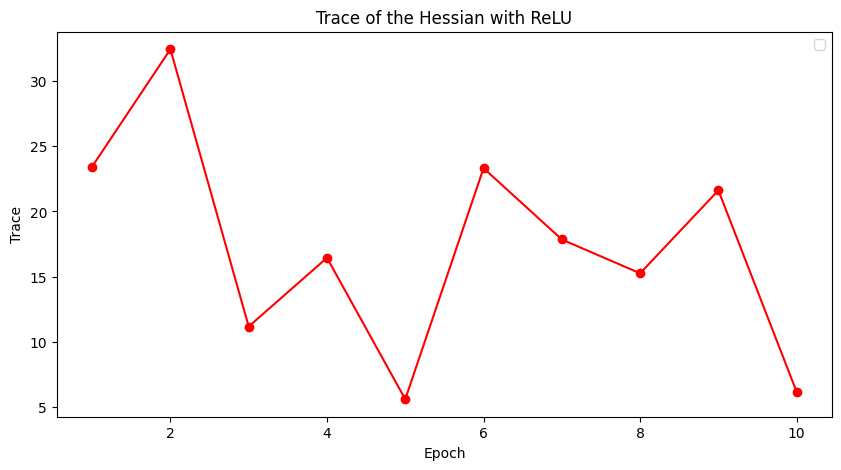

In [ ]:
# Plot the eigenvalues
plt.figure(figsize=(10, 5))
for epoch in range(1, num_epochs):
    plt.plot([epoch-1, epoch], [all_eigenvalues_relu[epoch-1][0], all_eigenvalues_relu[epoch][0]], '-o', color='black')
plt.title('Top Eigenvalues of the Hessian with ReLU')
plt.xlabel('Epoch')
plt.ylabel('Top Eigenvalue')
plt.legend()

# Plot the trace of the Hessian
plt.figure(figsize=(10, 5))
traces = [trace for epoch_traces in all_traces_relu for trace in epoch_traces]
plt.plot(range(1, len(traces)+1), traces, '-', color='red')
plt.title('Trace of the Hessian with ReLU')
plt.xlabel('iteration')
plt.ylabel('Trace')
plt.legend()


# Plot the trace of the Hessian
plt.figure(figsize=(10, 5))
epoch_traces = [sum(traces)/len(traces) for traces in all_traces_relu]
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, epoch_traces, '-o', color='red')
plt.title('Trace of the Hessian with ReLU')
plt.xlabel('Epoch')
plt.ylabel('Trace')
plt.legend()

plt.show()

# tanh Network:

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out


model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Create a list to store all eigenvalues
all_eigenvalues_tanh = []
all_traces_tanh = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Compute Hessian and its eigenvalues after each epoch
    hessian_comp = hessian(model, criterion, data=(images, labels), cuda=False)
    eigenvalues, eigenvectors = hessian_comp.eigenvalues()
    all_eigenvalues_tanh.append(eigenvalues)
    trace = hessian_comp.trace()
    all_traces_tanh.append(trace)

Epoch [1/10], Step [100/600], Loss: 0.3272
Epoch [1/10], Step [200/600], Loss: 0.2556
Epoch [1/10], Step [300/600], Loss: 0.2775
Epoch [1/10], Step [400/600], Loss: 0.2586
Epoch [1/10], Step [500/600], Loss: 0.2960
Epoch [1/10], Step [600/600], Loss: 0.2544
Epoch [2/10], Step [100/600], Loss: 0.1470
Epoch [2/10], Step [200/600], Loss: 0.3095
Epoch [2/10], Step [300/600], Loss: 0.1978
Epoch [2/10], Step [400/600], Loss: 0.1117
Epoch [2/10], Step [500/600], Loss: 0.1902
Epoch [2/10], Step [600/600], Loss: 0.2534
Epoch [3/10], Step [100/600], Loss: 0.0700
Epoch [3/10], Step [200/600], Loss: 0.0898
Epoch [3/10], Step [300/600], Loss: 0.1236
Epoch [3/10], Step [400/600], Loss: 0.1248
Epoch [3/10], Step [500/600], Loss: 0.0579
Epoch [3/10], Step [600/600], Loss: 0.0899
Epoch [4/10], Step [100/600], Loss: 0.0875
Epoch [4/10], Step [200/600], Loss: 0.0816
Epoch [4/10], Step [300/600], Loss: 0.1072
Epoch [4/10], Step [400/600], Loss: 0.0983
Epoch [4/10], Step [500/600], Loss: 0.1099
Epoch [4/10

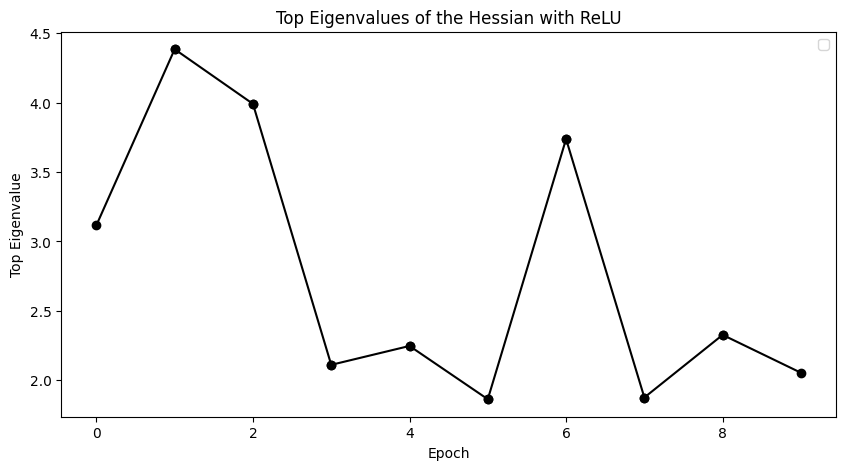

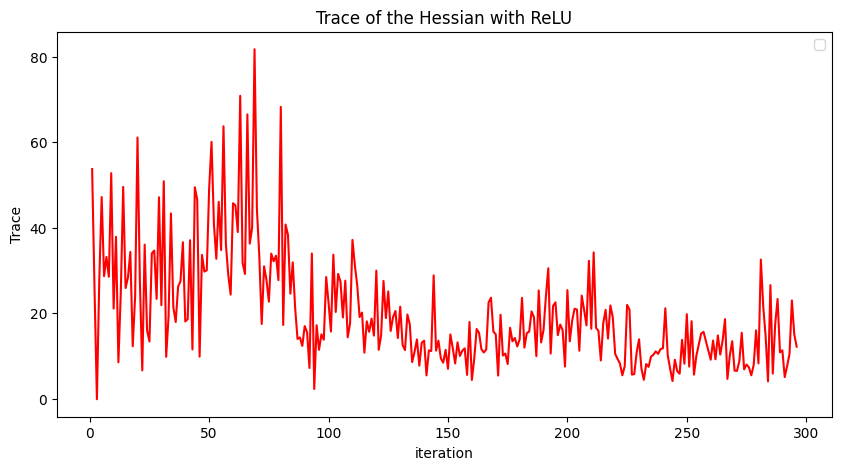

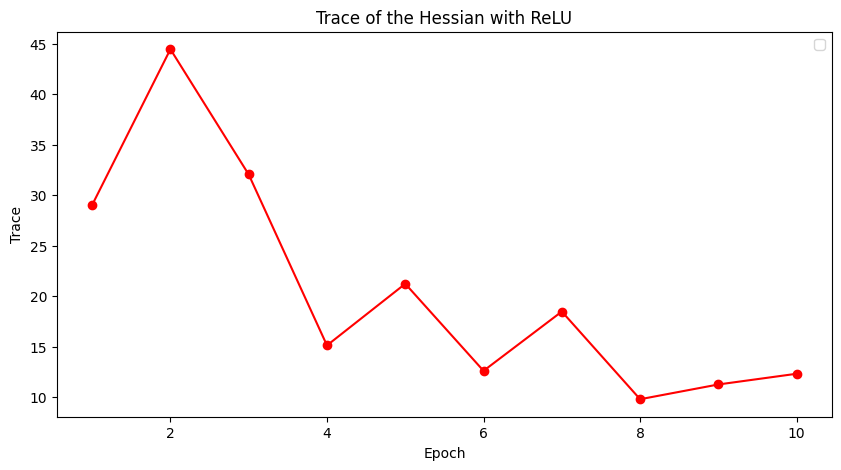

In [ ]:
# Plot the eigenvalues
plt.figure(figsize=(10, 5))
for epoch in range(1, num_epochs):
    plt.plot([epoch-1, epoch], [all_eigenvalues_tanh[epoch-1][0], all_eigenvalues_tanh[epoch][0]], '-o', color='black')
plt.title('Top Eigenvalues of the Hessian with tanh')
plt.xlabel('Epoch')
plt.ylabel('Top Eigenvalue')
plt.legend()

# Plot the trace of the Hessian
plt.figure(figsize=(10, 5))
traces = [trace for epoch_traces in all_traces_tanh for trace in epoch_traces]
plt.plot(range(1, len(traces)+1), traces, '-', color='red')
plt.title('Trace of the Hessian with tanh')
plt.xlabel('iteration')
plt.ylabel('Trace')
plt.legend()


# Plot the trace of the Hessian
plt.figure(figsize=(10, 5))
epoch_traces = [sum(traces)/len(traces) for traces in all_traces_tanh]
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, epoch_traces, '-o', color='red')
plt.title('Trace of the Hessian with tanh')
plt.xlabel('Epoch')
plt.ylabel('Trace')
plt.legend()

plt.show()

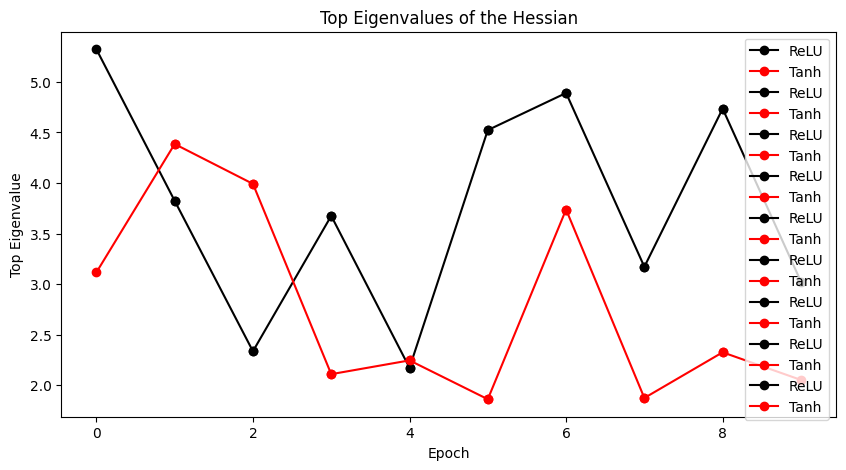

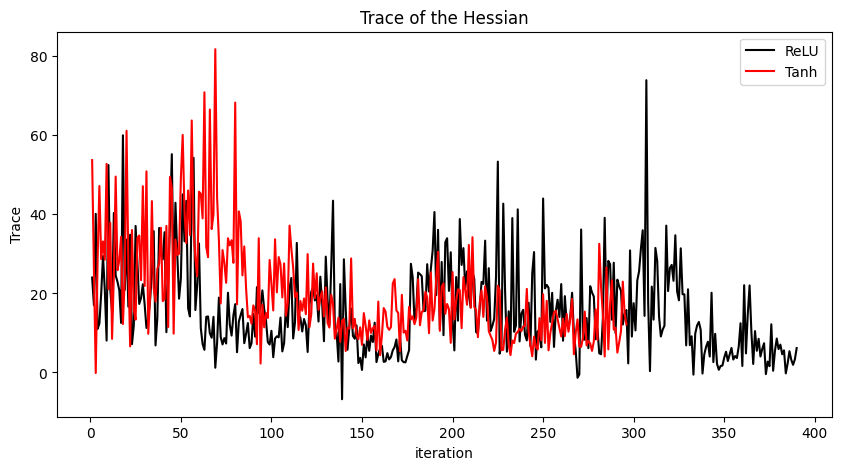

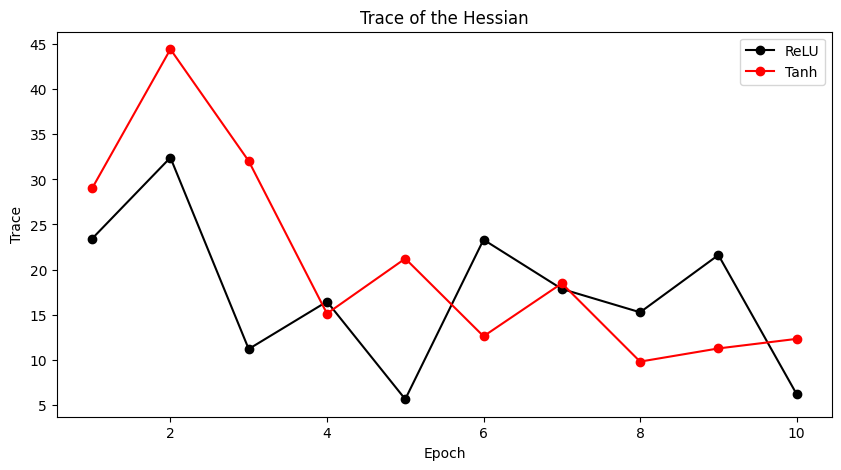

In [ ]:
# Plot the eigenvalues
plt.figure(figsize=(10, 5))
for epoch in range(1, num_epochs):
    plt.plot([epoch-1, epoch], [all_eigenvalues_relu[epoch-1][0], all_eigenvalues_relu[epoch][0]], '-o', color='black', label='ReLU')
    plt.plot([epoch-1, epoch], [all_eigenvalues_tanh[epoch-1][0], all_eigenvalues_tanh[epoch][0]], '-o', color='red', label='Tanh')
plt.title('Top Eigenvalues of the Hessian')
plt.xlabel('Epoch')
plt.ylabel('Top Eigenvalue')
plt.legend()

# Plot the trace of the Hessian
plt.figure(figsize=(10, 5))
traces_relu = [trace for epoch_traces in all_traces_relu for trace in epoch_traces]
traces_tanh = [trace for epoch_traces in all_traces_tanh for trace in epoch_traces]
plt.plot(range(1, len(traces_relu)+1), traces_relu, '-', color='black', label='ReLU')
plt.plot(range(1, len(traces_tanh)+1), traces_tanh, '-', color='red', label='Tanh')
plt.title('Trace of the Hessian')
plt.xlabel('iteration')
plt.ylabel('Trace')
plt.legend()

# Plot the trace of the Hessian
plt.figure(figsize=(10, 5))
epoch_traces_relu = [sum(traces)/len(traces) for traces in all_traces_relu]
epoch_traces_tanh = [sum(traces)/len(traces) for traces in all_traces_tanh]
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, epoch_traces_relu, '-o', color='black', label='ReLU')
plt.plot(epochs, epoch_traces_tanh, '-o', color='red', label='Tanh')
plt.title('Trace of the Hessian')
plt.xlabel('Epoch')
plt.ylabel('Trace')
plt.legend()

plt.show()

# Batch Normalization vs. no Batch Normalization:

In [88]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, use_batch_norm):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        if use_batch_norm:
            self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        if hasattr(self, 'bn1'):
            out = self.bn1(out)
        out = torch.relu(out)
        out = self.fc2(out)
        return out

# Train a model without batch normalization
model_nobn = NeuralNet(input_size, hidden_size, num_classes, False)
criterion_nobn = nn.CrossEntropyLoss()
optimizer_nobn = torch.optim.Adam(model_nobn.parameters(), lr=learning_rate)
all_eigenvalues_nobn = []
all_traces_nobn = []
all_loss_nobn = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        optimizer_nobn.zero_grad()
        outputs_nobn = model_nobn(images)
        loss_nobn = criterion_nobn(outputs_nobn, labels)
        loss_nobn.backward()
        optimizer_nobn.step()
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss_nobn.item()))
            all_loss_nobn.append(loss_nobn.item())
    hessian_comp_nobn = hessian(model_nobn, criterion_nobn, data=(images, labels), cuda=False)
    eigenvalues_nobn, eigenvectors_nobn = hessian_comp_nobn.eigenvalues()
    all_eigenvalues_nobn.append(eigenvalues_nobn)
    trace_nobn = hessian_comp_nobn.trace()
    all_traces_nobn.append(trace_nobn)

# Train a model with batch normalization
model_bn = NeuralNet(input_size, hidden_size, num_classes, True)
criterion_bn = nn.CrossEntropyLoss()
optimizer_bn = torch.optim.Adam(model_bn.parameters(), lr=learning_rate)
all_eigenvalues_bn = []
all_traces_bn = []
all_loss_bn = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        optimizer_bn.zero_grad()
        outputs_bn = model_bn(images)
        loss_bn = criterion_bn(outputs_bn, labels)
        loss_bn.backward()
        optimizer_bn.step()
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss_bn.item()))
            all_loss_bn.append(loss_bn.item())
    hessian_comp_bn = hessian(model_bn, criterion_bn, data=(images, labels), cuda=False)
    eigenvalues_bn, eigenvectors_bn = hessian_comp_bn.eigenvalues()
    all_eigenvalues_bn.append(eigenvalues_bn)
    trace_bn = hessian_comp_bn.trace()
    all_traces_bn.append(trace_bn)

Epoch [1/10], Step [100/600], Loss: 0.2216
Epoch [1/10], Step [200/600], Loss: 0.3193
Epoch [1/10], Step [300/600], Loss: 0.2888
Epoch [1/10], Step [400/600], Loss: 0.1158
Epoch [1/10], Step [500/600], Loss: 0.1801
Epoch [1/10], Step [600/600], Loss: 0.1107
Epoch [2/10], Step [100/600], Loss: 0.1667
Epoch [2/10], Step [200/600], Loss: 0.1210
Epoch [2/10], Step [300/600], Loss: 0.0910
Epoch [2/10], Step [400/600], Loss: 0.1842
Epoch [2/10], Step [500/600], Loss: 0.0813
Epoch [2/10], Step [600/600], Loss: 0.1910
Epoch [3/10], Step [100/600], Loss: 0.0678
Epoch [3/10], Step [200/600], Loss: 0.1215
Epoch [3/10], Step [300/600], Loss: 0.0289
Epoch [3/10], Step [400/600], Loss: 0.0583
Epoch [3/10], Step [500/600], Loss: 0.1498
Epoch [3/10], Step [600/600], Loss: 0.0555
Epoch [4/10], Step [100/600], Loss: 0.0343
Epoch [4/10], Step [200/600], Loss: 0.0458
Epoch [4/10], Step [300/600], Loss: 0.0204
Epoch [4/10], Step [400/600], Loss: 0.0252
Epoch [4/10], Step [500/600], Loss: 0.1244
Epoch [4/10

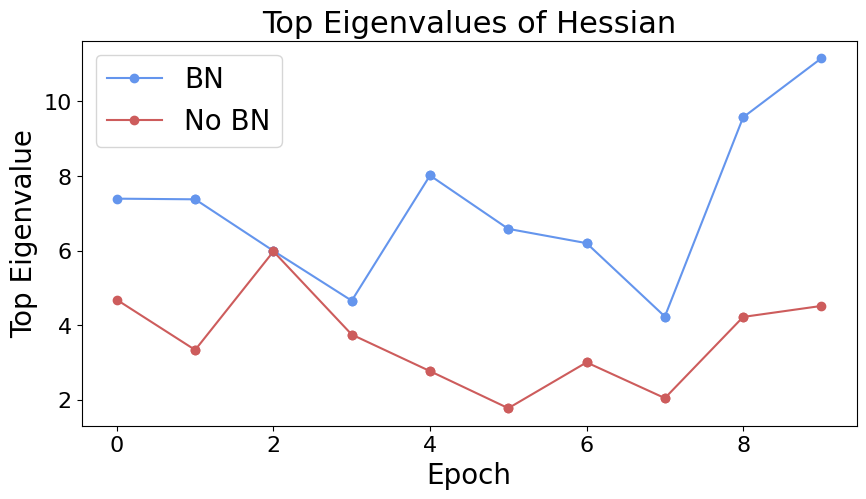

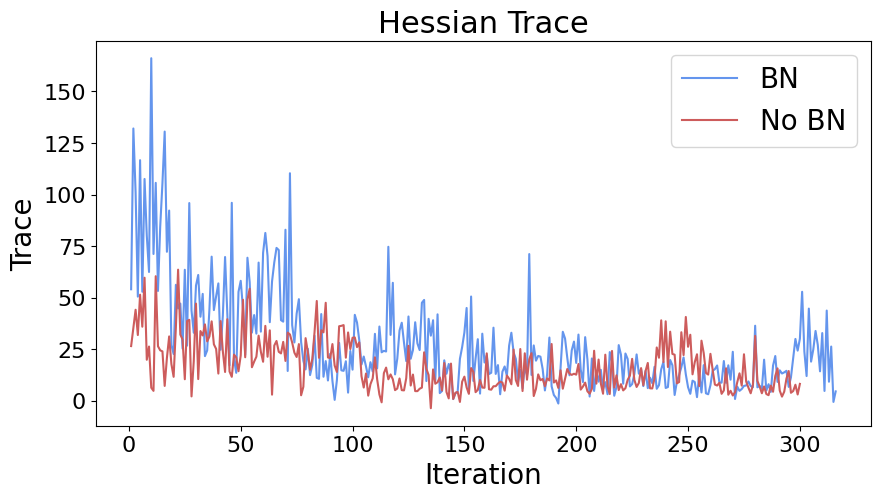

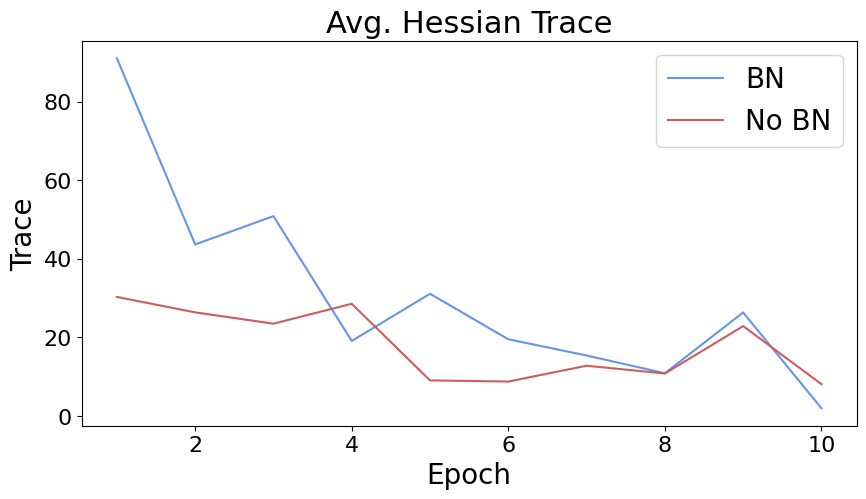

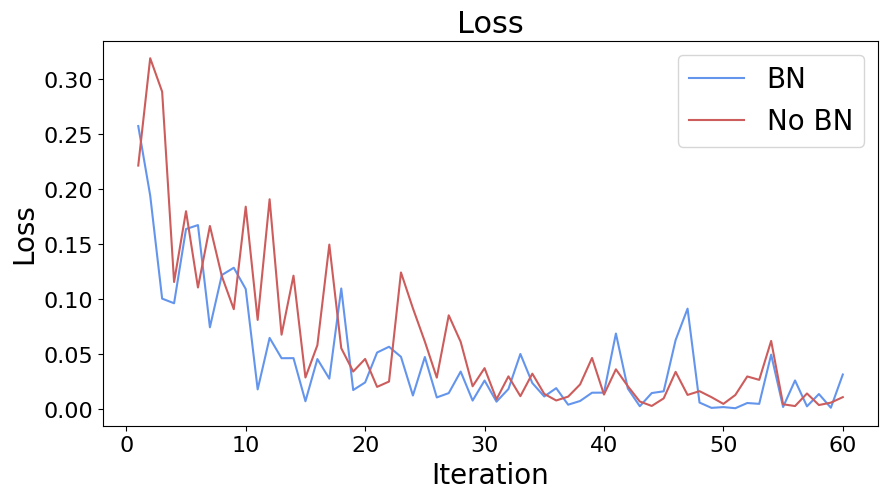

In [95]:
# Plot the eigenvalues with and without batch normalization
plt.figure(figsize=(10, 5))
for epoch in range(1, num_epochs):
    plt.plot([epoch-1, epoch], [all_eigenvalues_bn[epoch-1][0], all_eigenvalues_bn[epoch][0]], '-o', color='cornflowerblue')
    plt.plot([epoch-1, epoch], [all_eigenvalues_nobn[epoch-1][0], all_eigenvalues_nobn[epoch][0]], '-o', color='indianred')
plt.title('Top Eigenvalues of Hessian', fontsize=22)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Top Eigenvalue', fontsize=20)
plt.legend(['BN', 'No BN'], fontsize=20)
plt.tick_params(axis='both', labelsize=16)

# Plot the trace of the Hessian with and without batch normalization
plt.figure(figsize=(10, 5))
traces_bn = [trace for epoch_traces in all_traces_bn for trace in epoch_traces]
traces_nobn = [trace for epoch_traces in all_traces_nobn for trace in epoch_traces]
plt.plot(range(1, len(traces_bn)+1), traces_bn, '-', color='cornflowerblue')
plt.plot(range(1, len(traces_nobn)+1), traces_nobn, '-', color='indianred')
plt.title('Hessian Trace', fontsize=22)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Trace', fontsize=20)
plt.legend(['BN', 'No BN'], fontsize=20)
plt.tick_params(axis='both', labelsize=16)

# Plot the average trace of the Hessian with and without batch normalization
plt.figure(figsize=(10, 5))
epoch_traces_bn = [sum(traces)/len(traces) for traces in all_traces_bn]
epoch_traces_nobn = [sum(traces)/len(traces) for traces in all_traces_nobn]
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, epoch_traces_bn, '-', color='cornflowerblue')
plt.plot(epochs, epoch_traces_nobn, '-', color='indianred')
plt.title('Avg. Hessian Trace', fontsize=22)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Trace', fontsize=20)
plt.legend(['BN', 'No BN'], fontsize=20)
plt.tick_params(axis='both', labelsize=16)

plt.figure(figsize=(10, 5))
plt.plot(range(1,len(all_loss_bn)+1), all_loss_bn, '-', color='cornflowerblue')
plt.plot(range(1,len(all_loss_nobn)+1), all_loss_nobn, '-', color='indianred')
plt.title('Loss', fontsize=22)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.legend(['BN', 'No BN'], fontsize=20)
plt.tick_params(axis='both', labelsize=16)

plt.show()

# Optimizer: Adam vs SGD

In [92]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizerAdam = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizerSGD = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Create a list to store all eigenvalues
all_eigenvalues_adam = []
all_traces_adam = []
all_loss_adam = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizerAdam.zero_grad()
        loss.backward()
        optimizerAdam.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            all_loss_adam.append(loss.item())

    # Compute Hessian and its eigenvalues after each epoch
    hessian_comp_adam = hessian(model, criterion, data=(images, labels), cuda=False)
    eigenvalues_adam, eigenvectors_adam = hessian_comp_adam.eigenvalues()
    all_eigenvalues_adam.append(eigenvalues_adam)
    trace_adam = hessian_comp_adam.trace()
    all_traces_adam.append(trace_adam)

    # Create a list to store all eigenvalues
all_eigenvalues_sgd = []
all_traces_sgd = []
all_loss_sgd = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizerSGD.zero_grad()
        loss.backward()
        optimizerSGD.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            all_loss_sgd.append(loss.item())

    # Compute Hessian and its eigenvalues after each epoch
    hessian_comp_sgd = hessian(model, criterion, data=(images, labels), cuda=False)
    eigenvalues_sgd, eigenvectors_sgd = hessian_comp_sgd.eigenvalues()
    all_eigenvalues_sgd.append(eigenvalues_sgd)
    trace_sgd = hessian_comp_sgd.trace()
    all_traces_sgd.append(trace_sgd)


Epoch [1/10], Step [100/600], Loss: 0.1942
Epoch [1/10], Step [200/600], Loss: 0.1982
Epoch [1/10], Step [300/600], Loss: 0.1696
Epoch [1/10], Step [400/600], Loss: 0.2358
Epoch [1/10], Step [500/600], Loss: 0.1109
Epoch [1/10], Step [600/600], Loss: 0.2204
Epoch [2/10], Step [100/600], Loss: 0.1169
Epoch [2/10], Step [200/600], Loss: 0.0472
Epoch [2/10], Step [300/600], Loss: 0.1302
Epoch [2/10], Step [400/600], Loss: 0.0463
Epoch [2/10], Step [500/600], Loss: 0.1348
Epoch [2/10], Step [600/600], Loss: 0.0725
Epoch [3/10], Step [100/600], Loss: 0.0870
Epoch [3/10], Step [200/600], Loss: 0.0744
Epoch [3/10], Step [300/600], Loss: 0.0869
Epoch [3/10], Step [400/600], Loss: 0.0924
Epoch [3/10], Step [500/600], Loss: 0.0190
Epoch [3/10], Step [600/600], Loss: 0.0520
Epoch [4/10], Step [100/600], Loss: 0.0330
Epoch [4/10], Step [200/600], Loss: 0.0592
Epoch [4/10], Step [300/600], Loss: 0.0625
Epoch [4/10], Step [400/600], Loss: 0.0559
Epoch [4/10], Step [500/600], Loss: 0.0458
Epoch [4/10

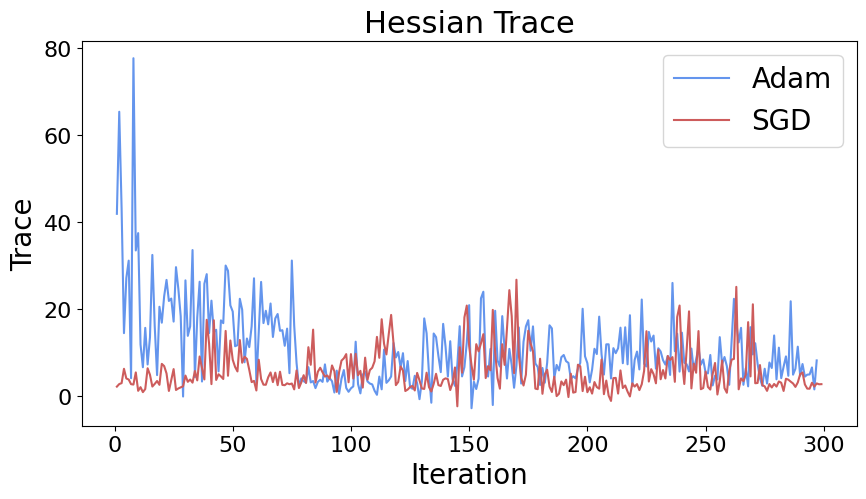

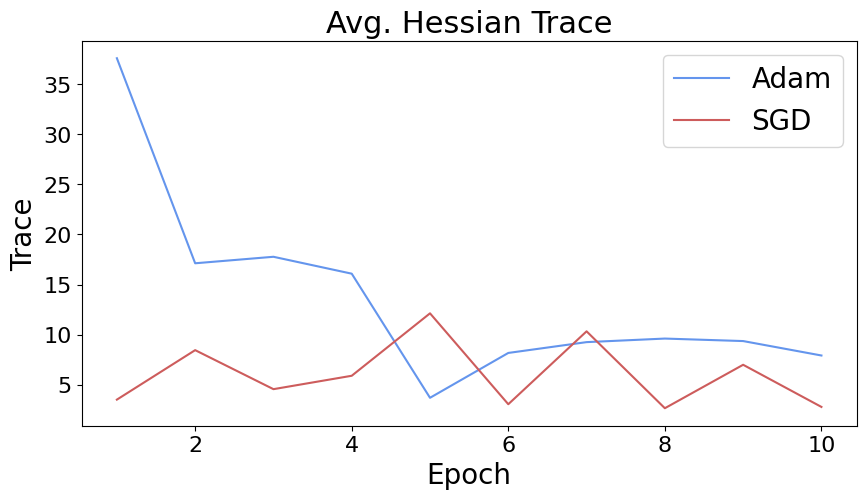

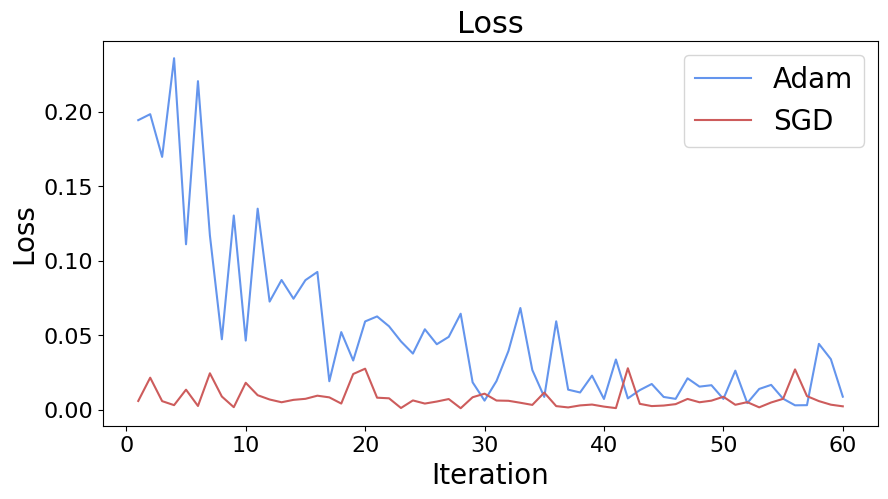

In [94]:
# Plot the trace of the Hessian
plt.figure(figsize=(10, 5))
traces_adam = [trace for epoch_traces in all_traces_adam for trace in epoch_traces]
traces_sgd = [trace for epoch_traces in all_traces_sgd for trace in epoch_traces]
plt.plot(range(1, len(traces_adam)+1), traces_adam, '-', color='cornflowerblue')
plt.plot(range(1, len(traces_sgd)+1), traces_sgd, '-', color='indianred')
plt.title('Hessian Trace', fontsize=22)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Trace', fontsize=20)
plt.legend(['Adam', 'SGD'], fontsize=20)
plt.tick_params(axis='both', labelsize=16)

# Plot the average trace of the Hessian
plt.figure(figsize=(10, 5))
epoch_traces_adam = [sum(traces)/len(traces) for traces in all_traces_adam]
epoch_traces_sgd = [sum(traces)/len(traces) for traces in all_traces_sgd]
epochs = list(range(1, num_epochs+1))
plt.plot(epochs, epoch_traces_adam, '-', color='cornflowerblue')
plt.plot(epochs, epoch_traces_sgd, '-', color='indianred')
plt.title('Avg. Hessian Trace', fontsize=22)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Trace', fontsize=20)
plt.legend(['Adam', 'SGD'], fontsize=20)
plt.tick_params(axis='both', labelsize=16)

plt.figure(figsize=(10, 5))
plt.plot(range(1,len(all_loss_adam)+1), all_loss_adam, '-', color='cornflowerblue')
plt.plot(range(1,len(all_loss_sgd)+1), all_loss_sgd, '-', color='indianred')
plt.title('Loss', fontsize=22)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.legend(['Adam', 'SGD'], fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.show()